In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import flare_prob
from appaloosa.appaloosa.aflare import aflare1
from scipy.signal import fftconvolve, correlate
from scipy.stats import skew

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

# make a "power spectrum" based on the skewness after flare convolution

Recipe:

- make white noise
- make small flares (w/ single preferred timescale)
- convolve flare model w/ a given timescale (t_1/2)
- compute skew
- repeat for other t_1/2 values
- plot skew versus t_1/2

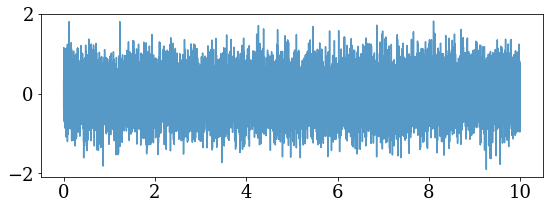

In [2]:
dt = 1./24./60. # 1 min

time = np.arange(0, 10, dt)
noise = np.random.randn(len(time)) * 0.5

plt.figure(figsize=(9,3))
plt.plot(time, noise, alpha=0.75)

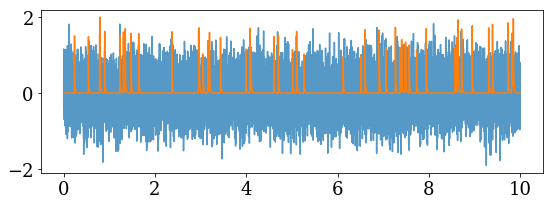

-0.0186200123267
5.52763043896
0.170664369377


In [3]:
# create a bunch of randomly generated flares to "hide" in the white noise
input_tau = 5. * dt

ampl_range = [1., 2.]

Nflares = 50

t_peak = np.random.random(Nflares) * 10
ampl = np.random.random(Nflares) * (ampl_range[1] - ampl_range[0]) + ampl_range[0]

flux = np.zeros_like(time)
for k in range(Nflares):
    flux = flux + aflare1(time, t_peak[k], input_tau, ampl[k], upsample=True)

plt.figure(figsize=(9,3))
plt.plot(time, noise, alpha=0.75)
plt.plot(time, flux)
plt.show()

# compute the total skew:
print(skew(noise))
print(skew(flux))

print(skew(flux+noise))

In [ ]:
# now convolve 
model_tau = np.arange(dt, 100*dt, .1*dt)
skew_out = np.zeros_like(model_tau)

for k in range(len(model_tau)):
    
    model = aflare1(np.arange(0,2,dt), 1, model_tau[k], 1, upsample=True)
    model = model / np.sum(model)

    conv = fftconvolve(flux+noise, model, mode='same')
    skew_out[k] = skew(conv) #  np.nanmedian(conv) #
    
#     plt.plot(time, conv, label=str(k))
    
#     print np.sum(conv)
#    plt.plot(np.arange(0,2,dt), model, label='model')
# plt.legend()
# plt.xlim(0,2.)
# plt.show()
#plt.ylim(0,.1)

plt.figure()
plt.plot(model_tau, skew_out)
plt.plot([input_tau, input_tau], [min(skew_out), max(skew_out)])
plt.xscale('log')
plt.xlabel('Timescale (days)')
plt.ylabel(r'SKEW($\tau$)')
plt.show()

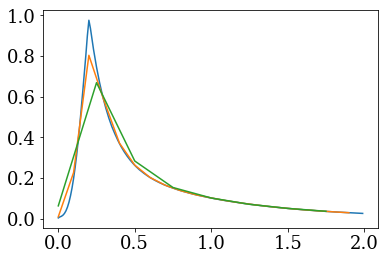

In [7]:
plt.plot(np.arange(0,2,0.01), aflare1(np.arange(0,2,0.01), 0.2, 0.2,1, upsample=True))
plt.plot(np.arange(0,2,0.1), aflare1(np.arange(0,2,0.1), 0.2, 0.2,1, upsample=True))
plt.plot(np.arange(0,2,0.25), aflare1(np.arange(0,2,0.25), 0.2, 0.2,1, upsample=True))